# Import of Libraries

In [2]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [38]:
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, OneHotEncoder,StandardScaler,PowerTransformer, MinMaxScaler, RobustScaler
from sklearn.model_selection import KFold, cross_val_predict, train_test_split,GridSearchCV,cross_val_score, cross_validate
from sklearn.linear_model import LinearRegression, Lasso, Ridge,ElasticNet
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.metrics import classification_report, confusion_matrix, log_loss, recall_score
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVR
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor, ExtraTreesRegressor
from sklearn.feature_selection import SelectKBest,SelectPercentile,f_classif,f_regression,mutual_info_regression
from sklearn.metrics import accuracy_score

# Import of dataset

In [4]:
stroke_data = pd.read_csv('stroke.csv')

# Data Exploration

In [44]:
stroke_data.size

61320

In [45]:
stroke_data.shape

(5110, 12)

In [6]:
stroke_data['stroke'].value_counts()

0    4861
1     249
Name: stroke, dtype: int64

In [5]:
stroke_data.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

array([[<AxesSubplot:title={'center':'id'}>,
        <AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'hypertension'}>],
       [<AxesSubplot:title={'center':'heart_disease'}>,
        <AxesSubplot:title={'center':'avg_glucose_level'}>,
        <AxesSubplot:title={'center':'bmi'}>],
       [<AxesSubplot:title={'center':'stroke'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

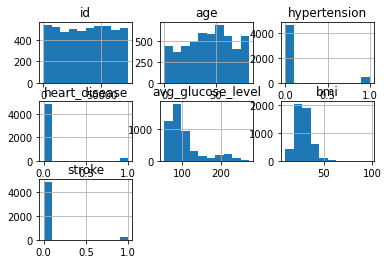

In [47]:
stroke_data.hist()

In [49]:
stroke_data.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.924697,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.839014,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.600000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


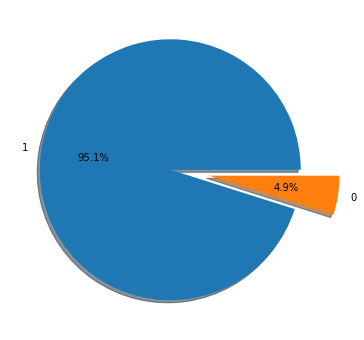

In [43]:
plt.figure(figsize=(10, 6))
plt.pie(y.value_counts(), labels=['1', '0'], autopct='%.1f%%', shadow=True, explode=(0, 0.3));

# Data Preprocessing : Dealing with null values

In [8]:
stroke_data.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

<AxesSubplot:>

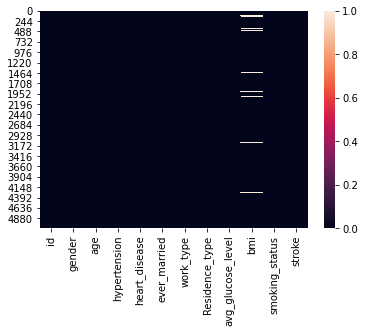

In [9]:
sns.heatmap(stroke_data.isnull() )

In [10]:
stroke_data['bmi'] = stroke_data['bmi'].fillna(method='ffill')

In [11]:
stroke_data.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

<AxesSubplot:>

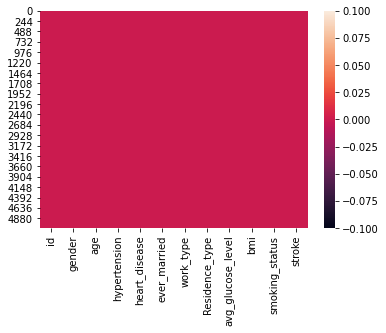

In [12]:
sns.heatmap(stroke_data.isnull() )

In [13]:
#Looking for possible correlation patterns in the datasets
corr_matrix = stroke_data.corr()
corr_matrix["stroke"].sort_values(ascending=False)

stroke               1.000000
age                  0.245257
heart_disease        0.134914
avg_glucose_level    0.131945
hypertension         0.127904
bmi                  0.043840
id                   0.006388
Name: stroke, dtype: float64

# Data Preparation

In [14]:
numerical= stroke_data.drop(['stroke'], axis=1).select_dtypes('number').columns

categorical = stroke_data.select_dtypes('object').columns

print(f'Numerical Columns:  { stroke_data[numerical].columns}')
print('\n')
print(f'Categorical Columns: { stroke_data[categorical].columns}')

Numerical Columns:  Index(['id', 'age', 'hypertension', 'heart_disease', 'avg_glucose_level',
       'bmi'],
      dtype='object')


Categorical Columns: Index(['gender', 'ever_married', 'work_type', 'Residence_type',
       'smoking_status'],
      dtype='object')


In [15]:
X = stroke_data.drop(['stroke'], axis=1)
y = stroke_data.stroke

In [16]:
X_encoded = pd.get_dummies(stroke_data, columns=['gender','ever_married','work_type','Residence_type','smoking_status'])
X_encoded.head()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Female,gender_Male,gender_Other,...,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,9046,67.0,0,1,228.69,36.6,1,0,1,0,...,0,1,0,0,0,1,0,1,0,0
1,51676,61.0,0,0,202.21,36.6,1,1,0,0,...,0,0,1,0,1,0,0,0,1,0
2,31112,80.0,0,1,105.92,32.5,1,0,1,0,...,0,1,0,0,1,0,0,0,1,0
3,60182,49.0,0,0,171.23,34.4,1,1,0,0,...,0,1,0,0,0,1,0,0,0,1
4,1665,79.0,1,0,174.12,24.0,1,1,0,0,...,0,0,1,0,1,0,0,0,1,0


In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state = 1)

In [18]:
from sklearn.preprocessing import StandardScaler 
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

# Random Forest

In [19]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
rfc.fit(X_train,y_train )

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [20]:
y_pred_rfc = rfc.predict(X_test)

In [21]:
y_pred_rfc_df = pd.DataFrame({'Expected':y_test, 'Predicted':y_pred_rfc})
y_pred_rfc_df.head(10)

,Expected,Predicted
4673,0,0
3232,0,0
3694,0,0
1070,0,0
4163,0,0
795,0,0
440,0,0
870,0,0
1102,0,0
836,0,0


In [22]:
y_pred_rfc_df

,Expected,Predicted
4673,0,0
3232,0,0
3694,0,0
1070,0,0
4163,0,0
...,...,...
2030,0,0
4555,0,0
1056,0,0
854,0,0


In [23]:
rfc_cm = confusion_matrix(y_test, y_pred_rfc)
rfc_cm

array([[962,   0],
       [  3,  57]], dtype=int64)

In [39]:
rfc_acc = accuracy_score(y_test, y_pred_rfc) 
rfc_acc

0.99706457925636

In [24]:
rfc_cr = classification_report(y_test, y_pred_rfc)
print(rfc_cr)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       962
           1       1.00      0.95      0.97        60

    accuracy                           1.00      1022
   macro avg       1.00      0.97      0.99      1022
weighted avg       1.00      1.00      1.00      1022



# Logistic Regression

In [25]:
from sklearn.linear_model import LogisticRegression
log_Reg = LogisticRegression(random_state = 1)
log_Reg.fit(X_train,y_train )

LogisticRegression(random_state=1)

In [26]:
y_pred_log_Reg = log_Reg.predict(X_test)

In [27]:
y_pred_log_Reg_df = pd.DataFrame({'Expected':y_test, 'Predicted':y_pred_log_Reg })
y_pred_log_Reg_df.head(10)

,Expected,Predicted
4673,0,0
3232,0,0
3694,0,0
1070,0,0
4163,0,0
795,0,0
440,0,0
870,0,0
1102,0,0
836,0,0


In [28]:
from sklearn.metrics import confusion_matrix, accuracy_score
log_Reg_cm = confusion_matrix(y_test, y_pred_log_Reg)
log_Reg_cm

array([[962,   0],
       [  0,  60]], dtype=int64)

In [29]:
log_Reg_acc = accuracy_score(y_test, y_pred_log_Reg) 
log_Reg_acc

1.0

In [30]:
log_Reg_cr = classification_report(y_test, y_pred_log_Reg)
print(log_Reg_cr)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       962
           1       1.00      1.00      1.00        60

    accuracy                           1.00      1022
   macro avg       1.00      1.00      1.00      1022
weighted avg       1.00      1.00      1.00      1022



# k - Nearest Neighbours

In [31]:
from sklearn.neighbors import KNeighborsClassifier
kNN = KNeighborsClassifier(n_neighbors = 5, metric='minkowski',p=2)
kNN.fit(X_train,y_train )

KNeighborsClassifier()

In [32]:
y_pred_kNN = kNN.predict(X_test)

In [33]:
y_pred_KNN_df = pd.DataFrame({'Expected':y_test, 'Predicted':y_pred_kNN })
y_pred_KNN_df.head(10)

,Expected,Predicted
4673,0,0
3232,0,0
3694,0,0
1070,0,0
4163,0,0
795,0,0
440,0,0
870,0,0
1102,0,0
836,0,0


In [34]:
KNN_cm = confusion_matrix(y_test, y_pred_kNN)
KNN_cm

array([[962,   0],
       [  0,  60]], dtype=int64)

In [35]:
#Calculate the accuracy of KNN model
KNN_acc = accuracy_score(y_test, y_pred_kNN) 
KNN_acc

1.0

In [36]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_kNN))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       962
           1       1.00      1.00      1.00        60

    accuracy                           1.00      1022
   macro avg       1.00      1.00      1.00      1022
weighted avg       1.00      1.00      1.00      1022



# Comparison of models

In [40]:
accuracy_data = {'K-Nearest Ngb.' : [KNN_acc],
                 'Logistic Reg' : [log_Reg_acc],
                 'Random Forest' : [rfc_acc]
                }

In [41]:
df = pd.DataFrame(accuracy_data)
df

,K-Nearest Ngb.,Logistic Reg,Random Forest
0,1.0,1.0,0.997065


<AxesSubplot:>

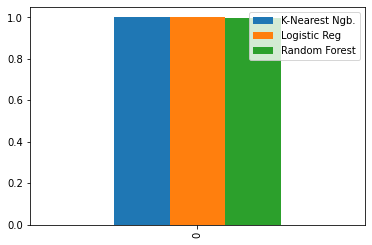

In [42]:
df.plot.bar()